# **Model Klasifikasi**  
Muhammad Fahmi Hussain

---

# **1. Import Library**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


# **2. Memuat Dataset dari Hasil Clustering**

In [ ]:
data = pd.read_csv('/content/customer_clustered.csv')

In [ ]:
data.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,days_since_registration,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Response,Purchases,Cluster
0,1957.0,2,4,58138.0,0.0,0.0,4501.0,58.0,635.0,8.0,...,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1617.0,0
1,1954.0,2,4,46344.0,1.0,1.0,3951.0,38.0,11.0,1.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0,0
2,1965.0,2,5,71613.0,0.0,0.0,4150.0,26.0,426.0,49.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,776.0,1
3,1984.0,2,5,26646.0,1.0,0.0,3977.0,26.0,11.0,4.0,...,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0,2
4,1981.0,4,3,58293.0,1.0,0.0,3999.0,94.0,173.0,43.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,422.0,0


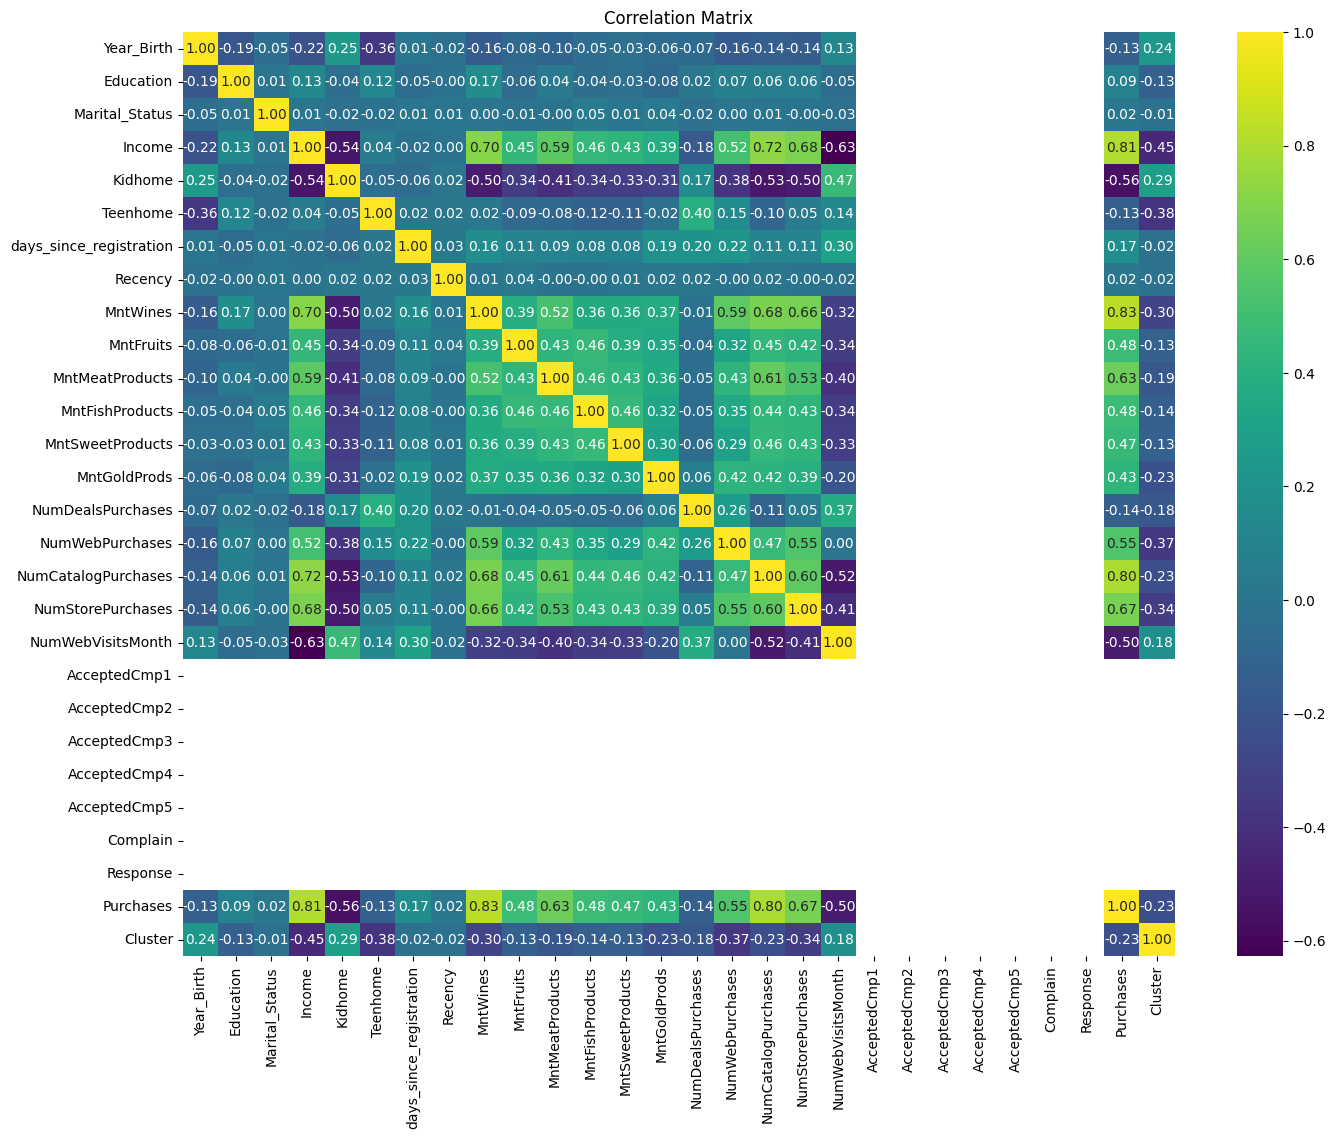

In [ ]:
# Menghitung matriks korelasi
correlation_matrix = data.corr()

# Visualisasi
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="viridis", cbar=True)
plt.title("Correlation Matrix")
plt.show()

In [ ]:
data.drop(columns=['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3', 'AcceptedCmp4','AcceptedCmp5',	'Complain',	'Response'], inplace=True)

# **3. Data Splitting**

In [ ]:
# Memisahkan fitur prediktor dan target
X = data.drop(columns=['Cluster'])
y = data['Cluster']

In [ ]:
# Melakukan normalisasi data
scaler = MinMaxScaler()

X = scaler.fit_transform(X)

In [ ]:
# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

In [ ]:
# Membangun model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
# Membangun model Logistic Regression
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Membangun model K Nearest Neighbor
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

## **b. Evaluasi Model Klasifikasi**

In [ ]:
y_pred_rf = rf_model.predict(X_test)

In [ ]:
y_pred_logreg = logreg_model.predict(X_test)

In [ ]:
y_pred_knn = knn_model.predict(X_test)

In [ ]:
# Evaluasi model
def evaluate_model(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    return cm, accuracy, f1, precision, recall

# Visualisasi confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {title}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()



Random Forest:
Accuracy: 1.0
F1 Score: 1.0
Precision: 1.0
Recall: 1.0


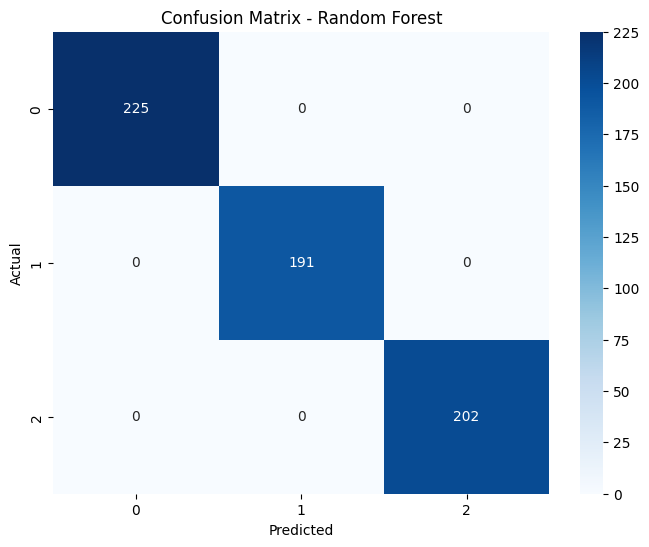

In [ ]:
# Evaluasi Random Forest
cm_rf, accuracy_rf, f1_rf, precision_rf, recall_rf = evaluate_model(y_test, y_pred_rf)
print("Random Forest:")
print("Accuracy:", accuracy_rf)
print("F1 Score:", f1_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)

plot_confusion_matrix(cm_rf, "Random Forest")


Logistic Regression:
Accuracy: 0.883495145631068
F1 Score: 0.8826505935401433
Precision: 0.8826921378595196
Recall: 0.883495145631068


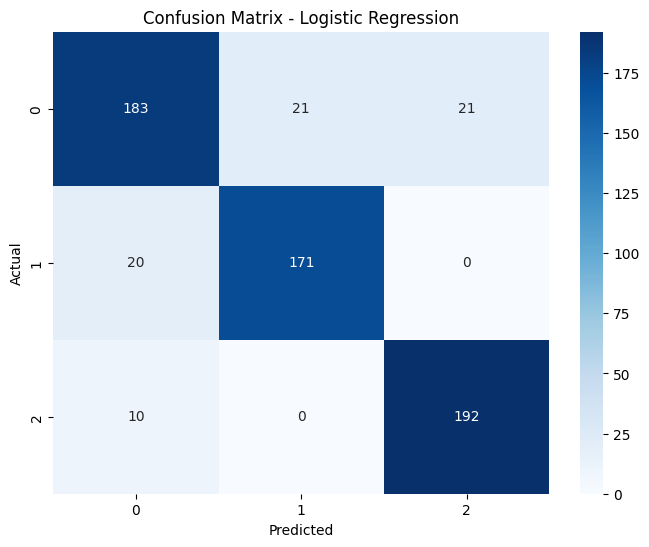

In [ ]:
# Evaluasi Logistic Regression
cm_logreg, accuracy_logreg, f1_logreg, precision_logreg, recall_logreg = evaluate_model(y_test, y_pred_logreg)
print("Logistic Regression:")
print("Accuracy:", accuracy_logreg)
print("F1 Score:", f1_logreg)
print("Precision:", precision_logreg)
print("Recall:", recall_logreg)

plot_confusion_matrix(cm_logreg, "Logistic Regression")

K-Nearest Neighbors:
Accuracy: 0.7718446601941747
F1 Score: 0.7702435728874356
Precision: 0.7710666486584224
Recall: 0.7718446601941747


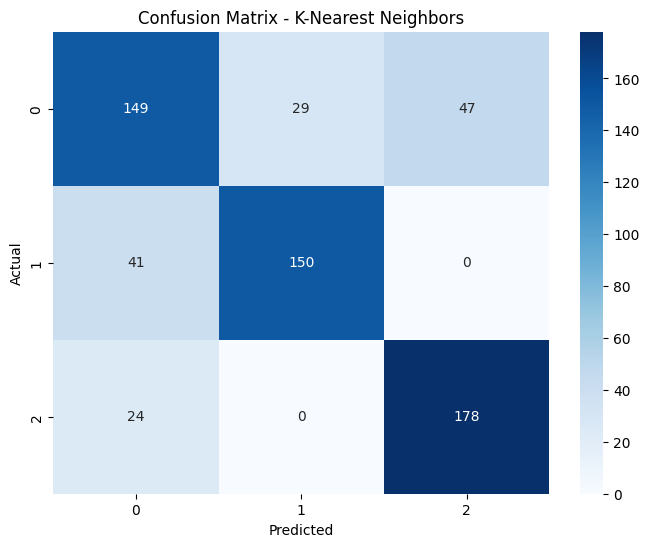

In [ ]:
# Evaluasi K-Nearest Neighbors
cm_knn, accuracy_knn, f1_knn, precision_knn, recall_knn = evaluate_model(y_test, y_pred_knn)
print("K-Nearest Neighbors:")
print("Accuracy:", accuracy_knn)
print("F1 Score:", f1_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)

plot_confusion_matrix(cm_knn, "K-Nearest Neighbors")

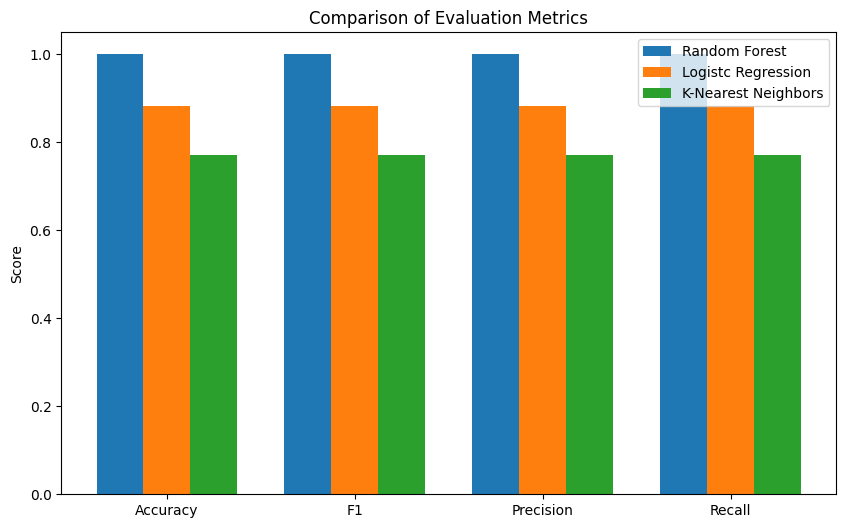

In [ ]:
# Visualisasi perbandingan metrik evaluasi
metrics = ['Accuracy','F1', 'Precision', 'Recall']
rf_scores = [accuracy_rf, f1_rf, precision_rf, recall_rf]
logreg_scores = [accuracy_logreg, f1_logreg, precision_logreg, recall_logreg]
knn_scores = [accuracy_knn, f1_knn, precision_knn, recall_knn]

x = np.arange(len(metrics))
width=0.25

plt.figure(figsize=(10, 6))
plt.bar(x - width, rf_scores, width=width, label='Random Forest', align='center')
plt.bar(x,logreg_scores, width=width, label='Logistc Regression', align='center')
plt.bar(x+width, knn_scores, width=width, label='K-Nearest Neighbors', align='center')
plt.xticks(x, metrics)
plt.ylabel('Score')
plt.title('Comparison of Evaluation Metrics')
plt.legend()
plt.show()


1. Random Forest:  
* Accuracy: 1.0, yang menunjukkan tingkat prediksi yang sangat tinggi.
* F1 Score, Precision, Recall: Semua skor identik (1.0), yang menunjukkan bahwa model ini memiliki keseimbangan yang sangat baik antara precision dan recall, serta sedikit kesalahan dalam prediksi.
* Hasil ini menunjukkan performa yang sangat bagus pada model Random Forest.
2. Logistic Regression:  
* Accuracy pada model ini adalah 0.8835, yang lebih rendah dibandingkan dengan Random Forest.
* F1 Score, Precision, Recall: Skor F1 (0.8827), Precision (0.8827), dan Recall (0.8835) mendekati satu sama lain, menunjukkan model cukup baik dalam membedakan kelas-kelas target, meskipun hasilnya lebih rendah dibandingkan Random Forest.
* Logistic Regression memberikan hasil yang wajar, tetapi tidak sebaik Random Forest dalam kasus ini.
3. K-Nearest Neighbors:  
* Accuracy: 0.7718, ini adalah skor terendah di antara ketiga model.
* F1 Score, Precision, Recall: Skor F1 (0.7702), Precision (0.7711), dan Recall (0.7718) semuanya lebih rendah dari Logistic Regression.
* Model KNN ini menunjukkan kinerja yang lebih buruk dibandingkan kedua model lainnya, yang bisa jadi disebabkan oleh ketidakmampuan model KNN untuk menangani data dengan kompleksitas atau outlier yang tinggi.

## **c. Analisis Hasil Evaluasi Model Klasifikasi**

**Identifikasi Kelemahan Model**
1. Random Forest:  
Kelemahan potensial: Model dapat kesulitan untuk menggeneralisasi pada data yang baru dan dapat terjebak dalam pola yang hanya ada pada data latih.
2. Logistic Regression:  
Model ini mungkin tidak cukup kompleks untuk menangkap pola yang lebih kompleks dalam data. Logistic Regression lebih cocok untuk masalah dengan hubungan linier, dan mungkin tidak cocok untuk dataset yang lebih non-linear atau lebih kompleks.
3. K-Nearest Neighbors (KNN):  
KNN cenderung kurang efektif jika dataset memiliki banyak dimensi atau fitur yang tidak relevan (high-dimensional data). Selain itu, KNN sensitif terhadap skala fitur dan noise, yang dapat mengurangi kinerjanya.

---

Mendeteksi Overfitting pada model Random Forest

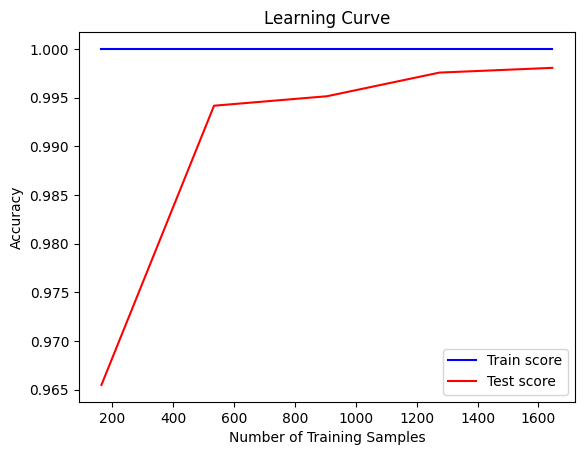

In [ ]:
from sklearn.model_selection import learning_curve

# Hitung learning curve
train_sizes, train_scores, test_scores = learning_curve(rf_model, X, y, cv=5)

# Hitung rata-rata dan deviasi standar untuk plotting
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

# Plot learning curves
plt.plot(train_sizes, train_mean, label="Train score", color='blue')
plt.plot(train_sizes, test_mean, label="Test score", color='red')
plt.xlabel('Number of Training Samples')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Learning Curve')
plt.show()


Dari plot learning curves, tidak terlihat bahwa model Random Forest mengalami overfitting

---

**Rekomendasi Tindakan Lanjutan**

1. **Logistic Regression** lebih cocok untuk masalah dengan hubungan linier. Penggunaan regularisasi dapat membantu mengurangi underfitting dan membantu model menangkap hubungan yang lebih kompleks tanpa terlalu overfit pada data latih.
2. **K-Nearest Neighbors** sangat sensitif terhadap fitur yang tidak relevan dan perbedaan skala antar fitur. Dapat dilakukan percobaan untuk mengurangi dimensi dengan PCA (Principal Component Analysis) untuk meningkatkan kinerja.Selain itu, menyesuaikan parameter k dan mencoba teknik weighted KNN atau distance-based weighting juga bisa menjadi solusi.
